# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [52]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge, SGDRegressor, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [64]:
# pip install --upgrade numpy scikit-learn
# %pip install numpy scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# Your code here

websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
websites.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1774,1605,969.000000,1475,1419,1654,1642,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,8,238,NaN,48,181,890,593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M0_109,NaN,NaN,UTF-8,Apache,NaN,US,CA,17/09/2008 0:00,2/09/2016 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,62,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [6]:
# Your comment here

#Si que hay que transformar alguna columna categorica a ordinal.

#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

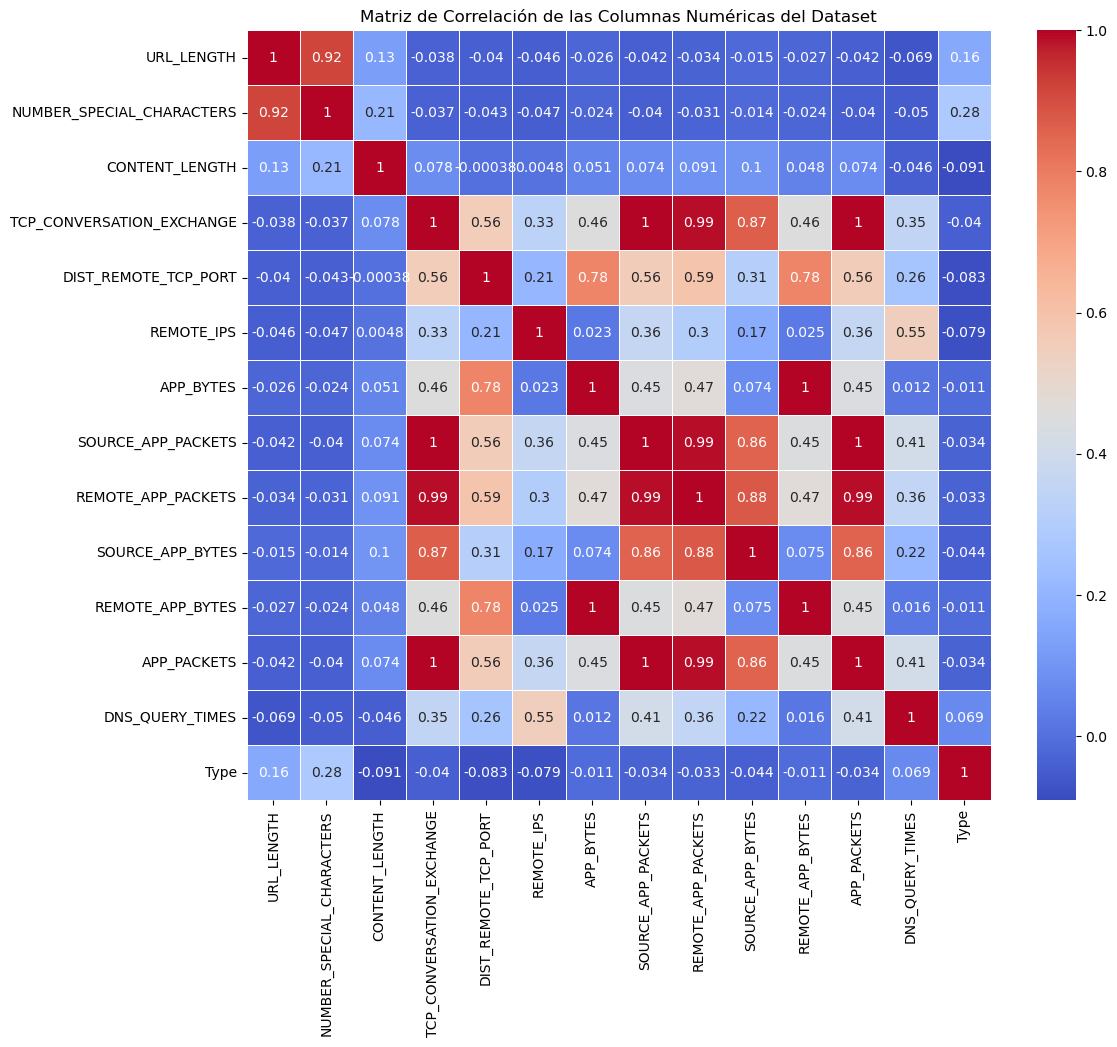

In [7]:
# Your code here

# Identificar columnas numéricas
numeric_columns = websites.select_dtypes(include=[np.number]).columns

# Crear la matriz de correlación usando solo las columnas numéricas
correlation_matrix = websites[numeric_columns].corr()

plt.figure(figsize=(12, 10))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Matriz de Correlación de las Columnas Numéricas del Dataset')
plt.show()


# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [8]:
# Your code here

# Identificar las columnas con alta colinealidad. Correlation_matrix: son las columnas numéricas

high_correlation = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Mostrar las correlaciones altas (excepto la diagonal)
high_correlation_without_diagonal = high_correlation.where(np.triu(np.ones(high_correlation.shape), k=1).astype(bool))
print("Columnas con alta colinealidad:")
print(high_correlation_without_diagonal.dropna(axis=0, how='all').dropna(axis=1, how='all'))

# Comentarios sobre las columnas con alta colinealidad
for column in high_correlation_without_diagonal.columns:
    correlated_columns = high_correlation_without_diagonal[column].dropna()
    if not correlated_columns.empty:
        print(f"\nLa columna '{column}' tiene alta colinealidad con: {correlated_columns}")
        correlated_columns

Columnas con alta colinealidad:
                           NUMBER_SPECIAL_CHARACTERS  SOURCE_APP_PACKETS  \
URL_LENGTH                                  0.917986                 NaN   
TCP_CONVERSATION_EXCHANGE                        NaN            0.997796   
APP_BYTES                                        NaN                 NaN   
SOURCE_APP_PACKETS                               NaN                 NaN   
REMOTE_APP_PACKETS                               NaN                 NaN   
SOURCE_APP_BYTES                                 NaN                 NaN   

                           REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
URL_LENGTH                                NaN               NaN   
TCP_CONVERSATION_EXCHANGE            0.990848          0.865580   
APP_BYTES                                 NaN               NaN   
SOURCE_APP_PACKETS                   0.989285          0.857495   
REMOTE_APP_PACKETS                        NaN          0.880555   
SOURCE_APP_BYTES                 

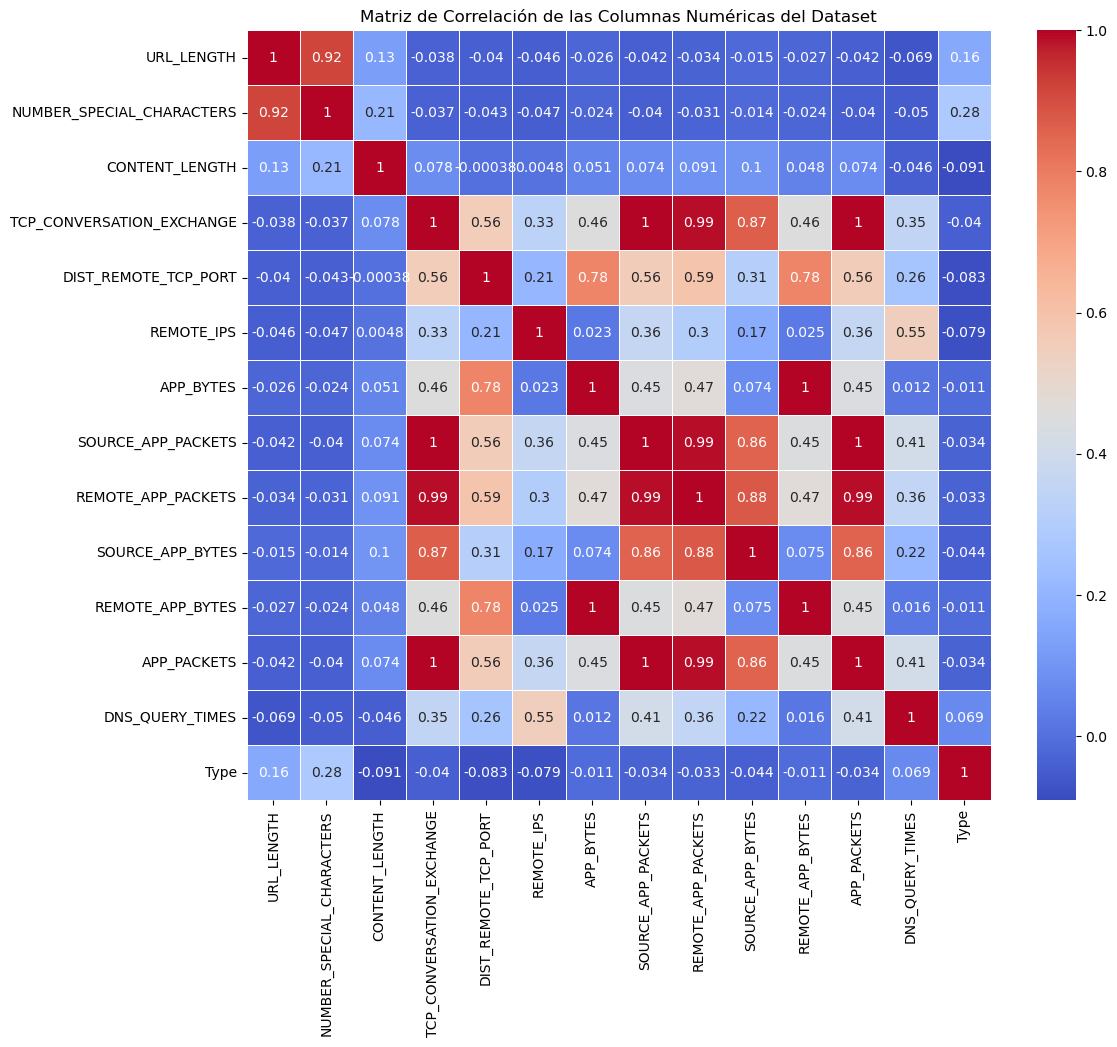

In [9]:
# Print heatmap again

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Matriz de Correlación de las Columnas Numéricas del Dataset')
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [10]:
# Your code here

# numero de missing values por columna
missing_values = websites.isnull().sum()

print("Number of missing values in each column:")
missing_values

Number of missing values in each column:


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [11]:
# Your code here

# Identifico las columnas con una alta proporción de valores faltantes y los borro
missing_threshold = 0.5  # Define the threshold for proportion of missing values
columns_to_drop = websites.columns[websites.isnull().mean() > missing_threshold]  # Identify columns with proportion of missing values exceeding the threshold
websites_cleaned = websites.drop(columns=columns_to_drop)  # Drop columns with high proportion of missing values

# Ahora lo mismo con las filas
websites_cleaned = websites_cleaned.dropna()  # Drop rows with missing values in the remaining columns


print("Shape del dataset limpio:", websites_cleaned.shape)

Shape del dataset limpio: (636, 21)


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [12]:
# Examine missing values in each column

# Contamos el numero de missing values en cada columna del dataset
missing_values_cleaned = websites_cleaned.isnull().sum()

# missing values en cada columna
print("Number of missing values in each column of the cleaned dataset:")
print(missing_values_cleaned)

Number of missing values in each column of the cleaned dataset:
URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [13]:
# Your code here

# sacamos los valore únicos de WHOIS_COUNTRY
unique_countries = websites_cleaned['WHOIS_COUNTRY'].unique()

print("Valores unicos de WHOIS_COUNTRY antes de la consolidation:")
print(unique_countries)

# Hacemos la consolidate
country_mapping = {
    'Cyprus': 'CY',
    'us': 'US',
    'se': 'SE',
    'United Kingdom': 'GB',
    "[u'GB'; u'UK']": 'GB' 
}

# Subimos los nuevos valores a WHOIS_COUNTRY
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].replace(country_mapping)


print("\nValores unicos de WHOIS_COUNTRY despues de la consolidation:")
print(websites_cleaned['WHOIS_COUNTRY'].unique())

Valores unicos de WHOIS_COUNTRY antes de la consolidation:
['US' 'RU' 'AU' 'CA' 'PA' 'GB' "[u'GB'; u'UK']" 'IN' 'UG' 'JP' 'UK' 'SI'
 'AT' 'CN' 'KY' 'TR' 'SC' 'NL' 'UA' 'CH' 'HK' 'IL' 'DE' 'IT' 'BS' 'NO'
 'us' 'BE' 'BY' 'AE' 'IE' 'PH' 'UY']

Valores unicos de WHOIS_COUNTRY despues de la consolidation:
['US' 'RU' 'AU' 'CA' 'PA' 'GB' 'IN' 'UG' 'JP' 'UK' 'SI' 'AT' 'CN' 'KY'
 'TR' 'SC' 'NL' 'UA' 'CH' 'HK' 'IL' 'DE' 'IT' 'BS' 'NO' 'BE' 'BY' 'AE'
 'IE' 'PH' 'UY']


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

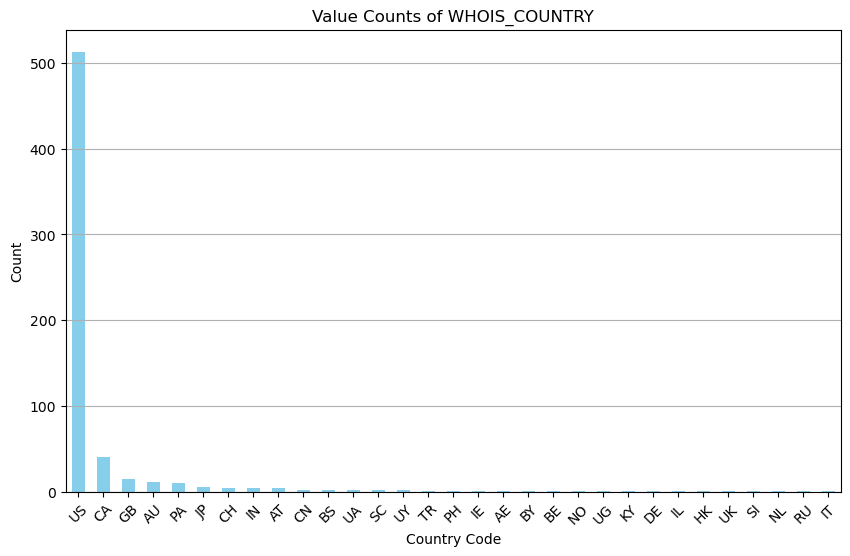

In [14]:
# Your code here

# Plot de WHOIS_COUNTRY
plt.figure(figsize=(10, 6))
websites_cleaned['WHOIS_COUNTRY'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Value Counts of WHOIS_COUNTRY')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [15]:
# Your code here

# 10 valores mas frecuentes de WHOIS_COUNTRY
top_countries = websites_cleaned['WHOIS_COUNTRY'].value_counts().head(10).index.tolist()

# Remplazo todos los valores que no esten el el top 10 por 'OTHER'
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].apply(lambda x: x if x in top_countries else 'OTHER')

print("Valores de WHOIS_COUNTRY: ")
print(websites_cleaned['WHOIS_COUNTRY'].unique())

Valores de WHOIS_COUNTRY: 
['US' 'OTHER' 'AU' 'CA' 'PA' 'GB' 'IN' 'JP' 'AT' 'CN' 'CH']


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [16]:
# Your code here

# Borro estas columnas 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE' del dataset.
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites_cleaned = websites_cleaned.drop(columns=columns_to_drop)




In [17]:
print("COLUMNAS EXISTENTES TRAS BORRAR ESTAS WHOIS_STATEPRO, WHOIS_REGDATE y WHOIS_UPDATED_DATE:")

websites_cleaned.columns

COLUMNAS EXISTENTES TRAS BORRAR ESTAS WHOIS_STATEPRO, WHOIS_REGDATE y WHOIS_UPDATED_DATE:


Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [18]:
# Your code here

print("Tipos de datos en el dataset:")
print(websites_cleaned.dtypes)

# Columnas categóricas
categorical_columns = websites_cleaned.select_dtypes(include=['object']).columns
print("\nColumnas categóricas:")
print(categorical_columns)



Tipos de datos en el dataset:
URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Columnas categóricas:
Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY'], dtype='object')


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [19]:
# Your code here

# Borramos columna URL
websites_cleaned = websites_cleaned.drop(columns=['URL'])

print("Despues de borrar columna URL:")
print(websites_cleaned.columns)




Despues de borrar columna URL:
Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [20]:
# Your code here

# Valores únicos de CHARSET
charset_value_counts = websites_cleaned['CHARSET'].value_counts()

charset_value_counts

CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [21]:
# Your code here

# Valores únicos de SERVER
server_unique_values = websites_cleaned['SERVER'].unique()

server_unique_values

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0',
       'Apache/2.4.7 (Ubuntu)', 'Apache',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22', 'Microsoft-IIS/7.5', 'nginx/1.12.0',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.4.25 (Amazon) PHP/7.0.14',
       'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3', 'ATS',
       'CherryPy/3.6.0', 'Apache/2.2.15 (CentOS)',
       'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40',
       'Apache/2.2.3 (CentOS)', 'Apache/2.4', 'Apache/2.4.10 (Debian)',
       'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [22]:
# Your code here

# Agrupamos los valores únicos de la columna SERVER porque hay demasiados.
def consolidate_server(server_value):
    if 'Microsoft' in server_value:
        return 'Microsoft'
    elif 'Apache' in server_value:
        return 'Apache'
    elif 'nginx' in server_value:
        return 'nginx'
    else:
        return 'Other'

# Aplicamos en la columna SERVER
websites_cleaned['SERVER'] = websites_cleaned['SERVER'].apply(consolidate_server)

# Valores únicos de SERVER ahora
print("Unique values of SERVER after consolidation:")
print(websites_cleaned['SERVER'].unique())


Unique values of SERVER after consolidation:
['nginx' 'Apache' 'Microsoft' 'Other']


In [23]:
# Valores únicos de SERVER

print("\nValores únicos de SERVER:")
print(websites_cleaned['SERVER'].value_counts())


Valores únicos de SERVER:
SERVER
Apache       298
Microsoft    127
Other        109
nginx        102
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [24]:
# Your code here

# Convertir columnas categóricas a dummy variables
website_dummy = pd.get_dummies(websites_cleaned, drop_first=True)


print("Columns after converting to dummy variables:")
print(website_dummy.columns)

Columns after converting to dummy variables:
Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'CHARSET_UTF-8', 'CHARSET_iso-8859-1',
       'CHARSET_us-ascii', 'CHARSET_utf-8', 'CHARSET_windows-1251',
       'SERVER_Microsoft', 'SERVER_Other', 'SERVER_nginx', 'WHOIS_COUNTRY_AU',
       'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CH', 'WHOIS_COUNTRY_CN',
       'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP',
       'WHOIS_COUNTRY_OTHER', 'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_US'],
      dtype='object')


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [36]:
# Your code here

# Revisar las columnas de website_dummy
print("Tipos de datos en website_dummy:")
print(website_dummy.dtypes)

categorical_columns_dummy = website_dummy.select_dtypes(include=['object']).columns

print("\nColumnas categóricas en website_dummy (debería estar vacío):")
print(categorical_columns_dummy)

Tipos de datos en website_dummy:
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
SERVER_Microsoft                bool
SERVER_Other                    bool
SERVER_nginx                    bool
WHOIS_COUNTRY_AU                bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_CH                bool
WHOIS_COUNTRY_CN                bool
WHOIS

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [60]:
from sklearn.model_selection import train_test_split


# Assume website_dummy is already loaded and target_column_name is the name of your target column

# Separate features and target
X = website_dummy.drop(columns=['Type']) 
y = website_dummy['Type'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (508, 31)
X_test shape: (128, 31)
y_train shape: (508,)
y_test shape: (128,)


In [38]:
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CH,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,6,162.0,31,22,3,3812,39,37,18784,...,False,False,False,False,False,False,False,False,False,True
6,18,6,345.0,12,0,3,1189,14,13,8559,...,False,False,False,False,False,False,False,False,False,True
7,19,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
11,20,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
16,21,7,686.0,6,0,2,603,8,9,1580,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,143,22,374.0,6,5,2,564,6,7,442,...,False,False,False,False,False,False,False,False,False,True
1762,146,24,11833.0,29,20,8,4167,33,33,3181,...,False,False,False,False,False,False,False,False,False,True
1774,183,29,4890.0,22,2,7,2062,30,26,8161,...,False,False,False,False,False,False,False,False,False,True
1778,201,34,8904.0,83,2,6,6631,87,89,132181,...,False,False,False,False,False,False,False,False,False,True


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [44]:
# Your code here:

log_reg_model = LogisticRegression()

# Print the initialized model to verify
print(log_reg_model)

LogisticRegression()


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [46]:
# Your code here:

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9375
Confusion Matrix:
 [[116   1]
 [  7   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       117
           1       0.80      0.36      0.50        11

    accuracy                           0.94       128
   macro avg       0.87      0.68      0.73       128
weighted avg       0.93      0.94      0.93       128



C:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [47]:
# Your code here:


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

Confusion Matrix:
 [[116   1]
 [  7   4]]
Accuracy Score: 0.9375


What are your thoughts on the performance of the model? Write your conclusions below.

In [30]:
# Your conclusions here:

# Es más preciso este modelo. La matriz de confusión proporciona un resumen de los resultados de la predicción. 
# Muestra el número de predicciones verdaderas positivas, verdaderas negativas, falsas positivas y falsas negativas.


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [71]:
# Your code here:


X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']

# Separo los datos 80/20 para poder entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializo el K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entreno el modelo
knn_model.fit(X_train, y_train)

# Hago la predicción
y_pred_knn = knn_model.predict(X_test)

# Evaluo el KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


print("Confusion Matrix for K-Nearest Neighbors:\n", conf_matrix_knn)
print("Accuracy Score for K-Nearest Neighbors:", accuracy_knn)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [68]:
# Your code here:

# Inicializo el K-Nearest Neighbors 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entreno el KNN model 
knn_model.fit(X_train, y_train)

# Hago la predicción
y_pred_knn = knn_model.predict(X_test)

# Evaluo el KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


print("Confusion Matrix for K-Nearest Neighbors:\n", conf_matrix_knn)
print("Accuracy Score for K-Nearest Neighbors:", accuracy_knn)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [70]:
# Your code here:

X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']

# Separo los datos 80/20 para poder entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializo el K-Nearest Neighbors 
knn_model_k5 = KNeighborsClassifier(n_neighbors=5)

# Entreno al modelo
knn_model_k5.fit(X_train, y_train)

# Hago la predicción
y_pred_knn_k5 = knn_model_k5.predict(X_test)

# Evaluo el KNN model con k=5
accuracy_knn_k5 = accuracy_score(y_test, y_pred_knn_k5)
conf_matrix_knn_k5 = confusion_matrix(y_test, y_pred_knn_k5)


print("Confusion Matrix for K-Nearest Neighbors with k=5:\n", conf_matrix_knn_k5)
print("Accuracy Score for K-Nearest Neighbors with k=5:", accuracy_knn_k5)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [34]:
# Your conclusions here:

He sido incapaz de hacerlo

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [35]:
# Your code here